In [58]:
import pickle as pkl
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from os.path import join
import glob
import platform


In [35]:
def get_loss_trajs(pattern, Ncomp_list, expdir):
    loss_traj_list = [  ]
    for Ncomp in Ncomp_list:
        try:
            filename = pattern % Ncomp
            data = pkl.load(open(join(expdir, filename), "rb"))
            meta, loss_traj = data
        except FileNotFoundError:
            continue
        loss_traj_list.append(loss_traj)
    return loss_traj_list
    
    
def plot_sweep_pattern(pattern, Ncomp_list, expdir, var_name="Ncomp",
                       title_desc="", ylim=None, xlim=None, logscale="plot"):
    plot_func = {"plot": plt.plot, 
                 "semilogx": plt.semilogx, 
                 "semilogy": plt.semilogy, 
                 "loglog": plt.loglog}[logscale]
    plt.figure()
    for Ncomp in Ncomp_list:
        filename = pattern % Ncomp
        try:
            data = pkl.load(open(join(expdir, filename), "rb"))
            meta, loss_traj = data
        except FileNotFoundError:
            continue
        # smooth loss
        loss_traj_smooth = np.convolve(loss_traj, np.ones(25)/25, mode="valid")
        plot_func(loss_traj_smooth, label=f"{var_name}={Ncomp}", linewidth=1.5, alpha=0.7)
    plt.legend()
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.title(f"Smooth loss traj\n{title_desc}")
    plt.show()

In [103]:
if platform.system() == "Darwin":
    rootdir = r"/Users/binxuwang/DL_Projects/HaimDiffusionRNNProj/Shape2d_MLP_train_kempner"
elif platform.system() == "Linux":
    rootdir = r"/n/holylabs/LABS/kempner_fellows/Users/binxuwang/DL_Projects/HaimDiffusionRNNProj/Shape2d_MLP_train_kempner"

dataset_str = "spiral_20" # "ring_20"
expdir = join(rootdir, f"{dataset_str}_lr_scaling")
# list pkl files
pkl_list = glob.glob(join(expdir, "*.pkl"))


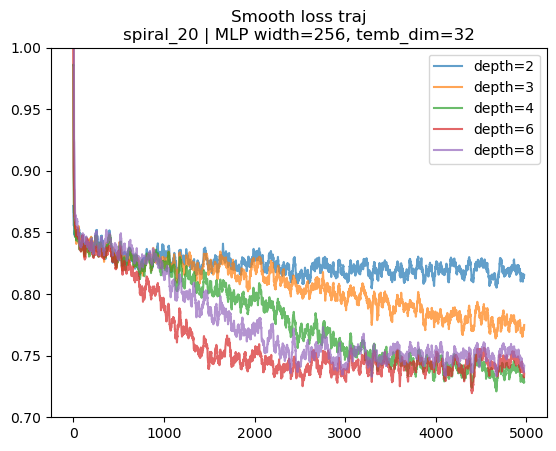

In [38]:
# fixed width, vary depth
mlp_width = 256
temb_dim = 32
pattern = f"{dataset_str}_NN_train_temb{temb_dim}_depth%d_width{mlp_width}_batch2048_ep5001.pkl"
plot_sweep_pattern(pattern, [2, 3, 4, 6, 8], expdir, var_name="depth", 
                   title_desc=f"{dataset_str} | MLP width={mlp_width}, temb_dim={temb_dim}", 
                   logscale="plot", ylim=[0.7, 1.0])

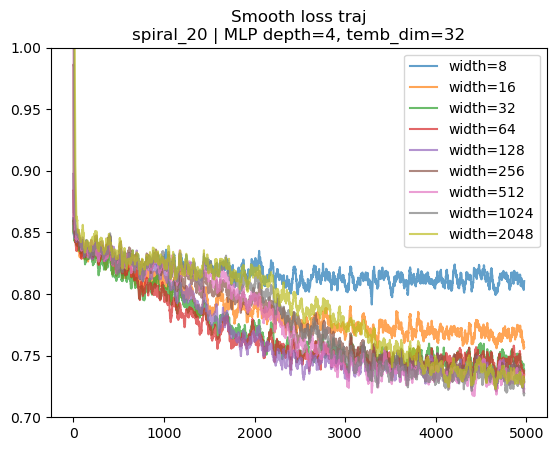

In [39]:
# fixed width, vary depth
# mlp_width = 512
mlp_depth = 4
temb_dim = 32
pattern = f"{dataset_str}_NN_train_temb{temb_dim}_depth{mlp_depth}_width%d_batch2048_ep5001.pkl"
plot_sweep_pattern(pattern, [8, 16, 32, 64, 128, 256, 512, 1024, 2048], 
                   expdir, var_name="width", 
                   title_desc=f"{dataset_str} | MLP depth={mlp_depth}, temb_dim={temb_dim}", 
                   logscale="plot", ylim=[0.7, 1.0])

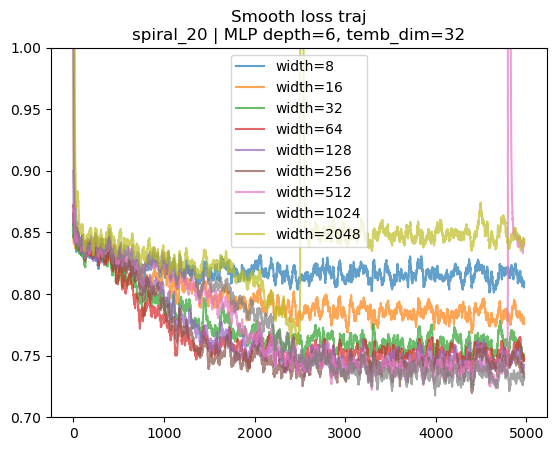

In [107]:
# fixed width, vary depth
# mlp_width = 512
mlp_depth = 6
temb_dim = 32
pattern = f"{dataset_str}_NN_train_temb{temb_dim}_depth{mlp_depth}_width%d_batch2048_ep5001.pkl"
plot_sweep_pattern(pattern, [8, 16, 32, 64, 128, 256, 512, 1024, 2048, ], 
                   expdir, var_name="width", 
                   title_desc=f"{dataset_str} | MLP depth={mlp_depth}, temb_dim={temb_dim}", 
                   logscale="plot", ylim=[0.7, 1.0])

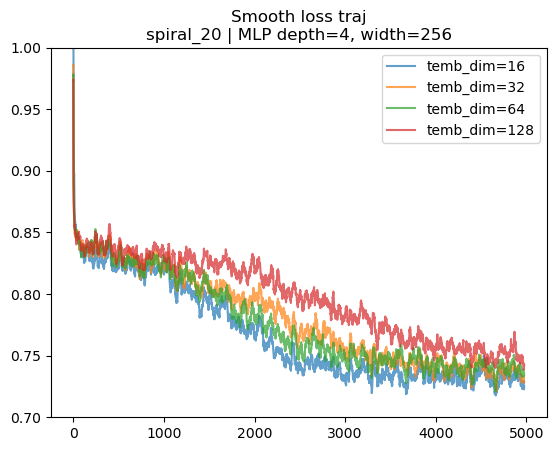

In [46]:
mlp_width = 256
mlp_depth = 4
# temb_dim = 32
pattern = f"{dataset_str}_NN_train_temb%d_depth{mlp_depth}_width{mlp_width}_batch2048_ep5001.pkl"
plot_sweep_pattern(pattern, [16, 32, 64, 128,], 
                   expdir, var_name="temb_dim", 
                   title_desc=f"{dataset_str} | MLP depth={mlp_depth}, width={mlp_width}", 
                   logscale="plot", ylim=[0.7, 1.0])

In [61]:
def get_loss_trajs_both(pattern, Ncomp_list, Ndepth_list, expdir):
    loss_traj_list = [  ]
    for Ncomp in Ncomp_list:
        batch_list = [  ]
        for Ndepth in Ndepth_list:
            try:
                filename = pattern % (Ncomp, Ndepth)
                data = pkl.load(open(join(expdir, filename), "rb"))
                meta, loss_traj = data
            except FileNotFoundError:
                print(f"File not found: {filename}")
                continue
            batch_list.append(loss_traj)
        loss_traj_list.append(batch_list)
    return loss_traj_list

In [69]:
temb_dim = 32
pattern = f"{dataset_str}_NN_train_temb{temb_dim}_depth%d_width%d_batch2048_ep5001.pkl"
mlp_depth_list = [2, 3, 4, 6, 8]
mlp_width_list = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]
loss_traj_list = get_loss_trajs_both(pattern, mlp_depth_list, mlp_width_list, expdir)
loss_traj_tsr = np.array(loss_traj_list)

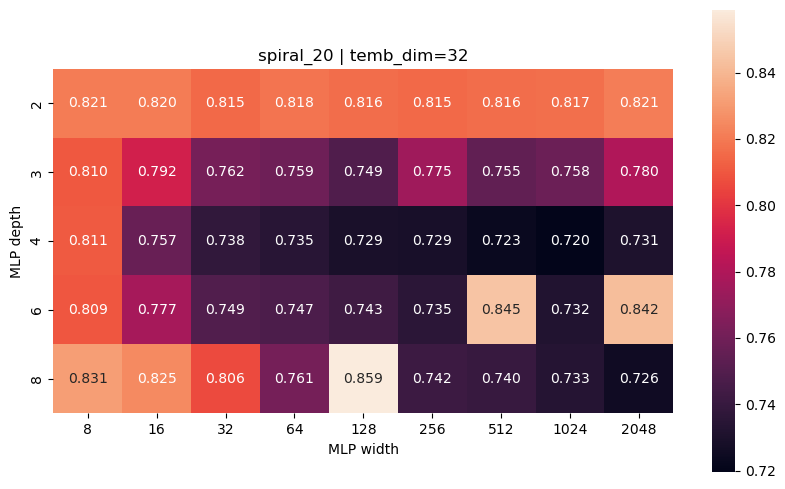

In [70]:
# sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.heatmap(loss_traj_tsr[:, :, -25:].mean(axis=-1), annot=True, fmt=".3f",
            xticklabels=mlp_width_list, yticklabels=mlp_depth_list)
plt.xlabel("MLP width")
plt.ylabel("MLP depth")
plt.title(f"{dataset_str} | temb_dim={temb_dim}")
plt.axis("image")
plt.show()

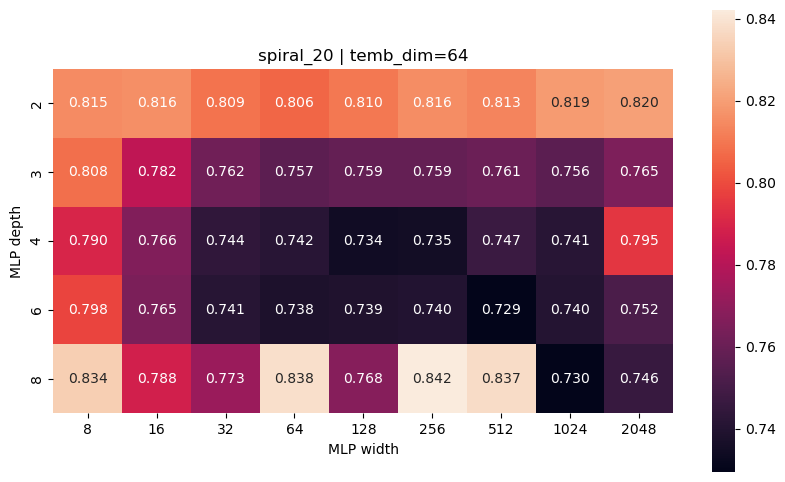

In [71]:
temb_dim = 64
pattern = f"{dataset_str}_NN_train_temb{temb_dim}_depth%d_width%d_batch2048_ep5001.pkl"
mlp_depth_list = [2, 3, 4, 6, 8]
mlp_width_list = [8, 16, 32, 64, 128, 256, 512, 1024, 2048]
loss_traj_list = get_loss_trajs_both(pattern, mlp_depth_list, mlp_width_list, expdir)
loss_traj_tsr = np.array(loss_traj_list)
# sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.heatmap(loss_traj_tsr[:, :, -25:].mean(axis=-1), annot=True, fmt=".3f",
            xticklabels=mlp_width_list, yticklabels=mlp_depth_list)
plt.xlabel("MLP width")
plt.ylabel("MLP depth")
plt.title(f"{dataset_str} | temb_dim={temb_dim}")
plt.axis("image")
plt.show()

### GMM Ansatz

In [74]:
if platform.system() == "Darwin":
    raise NotImplementedError
    rootdir = r"/Users/binxuwang/DL_Projects/HaimDiffusionRNNProj/Shape2d_MLP_train_kempner"
elif platform.system() == "Linux":
    rootdir = r"/n/holylabs/LABS/kempner_fellows/Users/binxuwang/DL_Projects/HaimDiffusionRNNProj/Shape2d_GMM_ansatz_train_kempner"
    
# dataset_str = "spiral_50" # "ring_20"
# dataset_str = "ring_20" # "ring_20"
dataset_str = "spiral_20" 
expdir = join(rootdir, f"{dataset_str}")
# list pkl files
pkl_list = glob.glob(join(expdir, "*.pkl"))

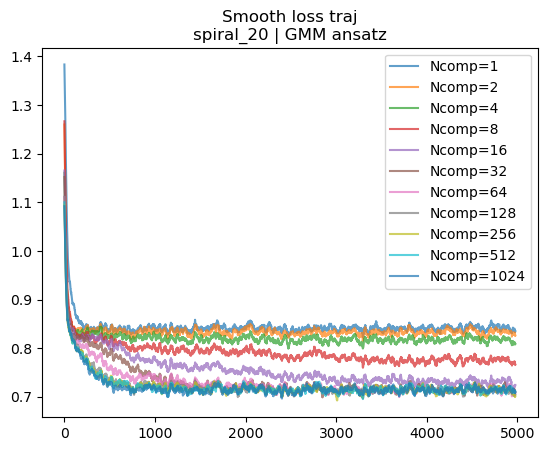

In [84]:
pattern = f"{dataset_str}_ansatz_NN_train_Ncomp%d_batch2048_ep5001.pkl"
plot_sweep_pattern(pattern, [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024], expdir, 
                   var_name="Ncomp", title_desc=f"{dataset_str} | GMM ansatz", 
                   logscale="plot")

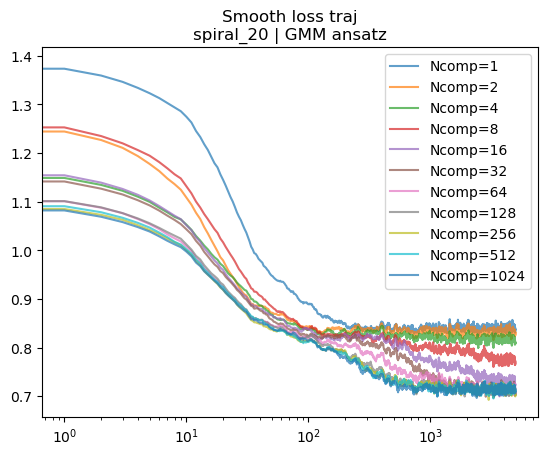

In [85]:
pattern = f"{dataset_str}_ansatz_NN_train_Ncomp%d_batch2048_ep5001.pkl"
plot_sweep_pattern(pattern, [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024], expdir, 
                   var_name="Ncomp", title_desc=f"{dataset_str} | GMM ansatz", 
                   logscale="semilogx")

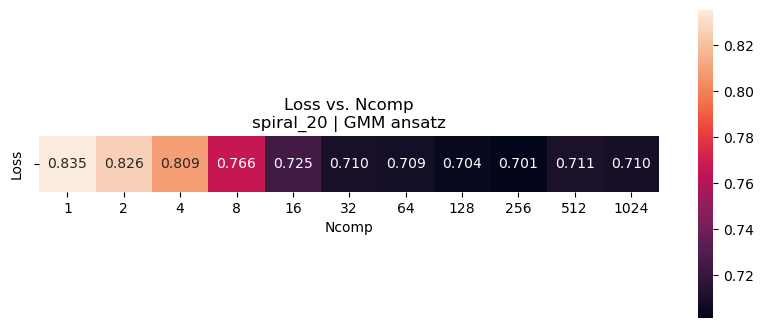

In [82]:
Ncomps = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
# Ncomps = [1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 14, 16, 18, 20, 24, 28, 32, 36, 40, 45, 50, 64, 96, 128, 192, 256, 384, 512, 1024]
loss_col = get_loss_trajs(pattern, Ncomps, expdir,)
loss_mat = np.array(loss_col)
end_loss = loss_mat[:, -25:].mean(axis=-1)

plt.figure(figsize=(10, 4))
sns.heatmap(loss_mat[:, -25:].mean(axis=-1).reshape(1, -1), annot=True, fmt=".3f",
            xticklabels=Ncomps, yticklabels=[""])
# plt.semilogx(Ncomps, end_loss, marker="o")
plt.xlabel("Ncomp")
plt.ylabel("Loss")
plt.axis("image")
plt.title(f"Loss vs. Ncomp\n{dataset_str} | GMM ansatz")
plt.show()

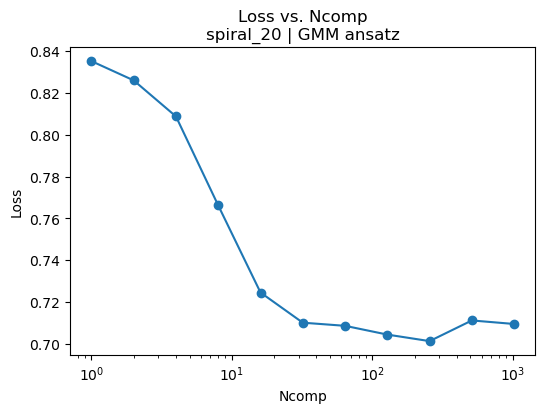

In [100]:
Ncomps = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
# Ncomps = [1, 2, 3, 4, 5, 6, 7, 8, 10, 12, 14, 16, 18, 20, 24, 28, 32, 36, 40, 45, 50, 64, 96, 128, 192, 256, 384, 512, 1024]
loss_col = get_loss_trajs(pattern, Ncomps, expdir,)
loss_mat = np.array(loss_col)
end_loss = loss_mat[:, -25:].mean(axis=-1)

plt.figure(figsize=(6, 4))
# sns.heatmap(loss_mat[:, -25:].mean(axis=-1).reshape(1, -1), annot=True, fmt=".3f",
#             xticklabels=Ncomps, yticklabels=[""])
plt.semilogx(Ncomps, end_loss, marker="o")
plt.xlabel("Ncomp")
plt.ylabel("Loss")
# plt.axis("image")
plt.title(f"Loss vs. Ncomp\n{dataset_str} | GMM ansatz")
plt.show()

In [ ]:
"""Fixed width, vary depth"""
# mlp_depth = 3
mlp_width = 256
temb_dim = 32
plt.figure()
for mlp_depth in [2, 3, 4, 6, 8]:
    filename = f"{dataset_str}_NN_train_temb{temb_dim}_depth{mlp_depth}_width{mlp_width}_batch2048_ep5001.pkl"
    try:
        data = pkl.load(open(join(expdir, filename), "rb"))
        meta, loss_traj = data
    except FileNotFoundError:
        continue
    # smooth loss
    loss_traj_smooth = np.convolve(loss_traj, np.ones(25)/25, mode="valid")
    plt.plot(loss_traj_smooth, label=f"depth={mlp_depth}")
plt.legend()
plt.title(f"Smooth loss traj\nMLP width={mlp_width}, temb_dim={temb_dim}")
plt.show()

In [ ]:
"""Fixed depth, vary width"""
mlp_depth = 3
# mlp_width = 64
temb_dim = 32
plt.figure()
for mlp_width in [8, 16, 32, 64, 128, 256, 512, 1024, ]:
    filename = f"{dataset_str}_NN_train_temb{temb_dim}_depth{mlp_depth}_width{mlp_width}_batch2048_ep5001.pkl"
    try:
        data = pkl.load(open(join(expdir, filename), "rb"))
        meta, loss_traj = data
    except FileNotFoundError:
        continue
    # smooth loss
    loss_traj_smooth = np.convolve(loss_traj, np.ones(25)/25, mode="valid")
    plt.plot(loss_traj_smooth, label=f"width={mlp_width}")
plt.title(f"Smooth loss traj\nMLP depth={mlp_depth}, temb_dim={temb_dim}")
plt.legend()
plt.ylim([0.7, 1.1])
plt.show()


In [ ]:
loss_traj_smooth[-1]


In [ ]:
"""Fixed depth, vary width"""
mlp_depth = 3
# mlp_width = 64
temb_dim = 32
plt.figure()
for mlp_width in [8, 16, 32, 64, 128, 256, 512, 1024, ]:
    filename = f"{dataset_str}_NN_train_temb{temb_dim}_depth{mlp_depth}_width{mlp_width}_batch2048_ep5001.pkl"
    try:
        data = pkl.load(open(join(expdir, filename), "rb"))
        meta, loss_traj = data
    except FileNotFoundError:
        continue
    # smooth loss
    loss_traj_smooth = np.convolve(loss_traj, np.ones(25)/25, mode="valid")
    plt.loglog(loss_traj_smooth, label=f"width={mlp_width}")
plt.title(f"Smooth loss traj\nMLP depth={mlp_depth}, temb_dim={temb_dim}")
plt.legend()
plt.ylim([0.7, 1.1])
plt.show()


In [ ]:
"""Fixed depth, width, vary temb_dim"""
mlp_depth = 4
mlp_width = 32
temb_dim = 32
plt.figure()
for temb_dim in [16, 32, 64, 128,]:
    filename = f"{dataset_str}_NN_train_temb{temb_dim}_depth{mlp_depth}_width{mlp_width}_batch2048_ep5001.pkl"
    try:
        data = pkl.load(open(join(expdir, filename), "rb"))
        meta, loss_traj = data
    except FileNotFoundError:
        continue
    # smooth loss
    loss_traj_smooth = np.convolve(loss_traj, np.ones(25)/25, mode="valid")
    plt.plot(loss_traj_smooth, label=f"t emb dim={temb_dim}")
plt.title(f"Smooth loss traj\nMLP depth={mlp_depth}, width={mlp_width}")
plt.legend()
# plt.ylim([0.7, 1.1])
plt.show()

In [ ]:
import torch
import torch.nn as nn
ndim = 32
batch = 1000
for ndim in [8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]:
    Wtmp = nn.Linear(ndim, ndim)
    in_vec = torch.randn(batch, ndim)
    out_vec = Wtmp(in_vec)
    plt.semilogx(np.ones(batch)*ndim, 
             out_vec.std(dim=1).detach().numpy(), 
             label=f"ndim={ndim}",
             marker=".", alpha=0.5)
    # out_vec.std(dim=1)
plt.legend()
plt.show()

In [ ]:
for ndim in [8, 16, 32, 64, 128, 256, 512, 1024, 2048, 4096]:
    Wtmp = nn.Linear(ndim, ndim)
    print(ndim, (Wtmp.weight.mean()).item(), "+-",(Wtmp.weight.std()** 2 * ndim).item())

In [90]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
def marginal_prob_std(t, sigma):
  """Note that this std -> 0, when t->0
  So it's not numerically stable to sample t=0 in the dataset
  Note an earlier version missed the sqrt...
  """
  return torch.sqrt( (sigma**(2*t) - 1) / 2 / torch.log(torch.tensor(sigma)) ) # sqrt fixed Jun.19


class GaussianFourierProjection(nn.Module):
  """Gaussian random features for encoding time steps.
  Basically it multiplexes a scalar `t` into a vector of `sin(2 pi k t)` and `cos(2 pi k t)` features.
  """
  def __init__(self, embed_dim, scale=30.):
    super().__init__()
    # Randomly sample weights during initialization. These weights are fixed
    # during optimization and are not trainable.
    self.W = nn.Parameter(torch.randn(embed_dim // 2) * scale, requires_grad=False)
  def forward(self, t):
    t_proj = t.view(-1, 1) * self.W[None, :] * 2 * math.pi
    return torch.cat([torch.sin(t_proj), torch.cos(t_proj)], dim=-1)


class ScoreModel_Time_edm(nn.Module):
  """A time-dependent score-based model."""

  def __init__(self, sigma, ndim=2, nlayers=5, nhidden=50, time_embed_dim=10,
               act_fun=nn.Tanh):
    super().__init__()
    self.embed = GaussianFourierProjection(time_embed_dim, scale=1)
    layers = []
    layers.extend([nn.Linear(time_embed_dim + ndim, nhidden), act_fun()])
    for _ in range(nlayers - 2):
        layers.extend([nn.Linear(nhidden, nhidden), act_fun()])
    layers.extend([nn.Linear(nhidden, ndim)])
    self.net = nn.Sequential(*layers)
    self.marginal_prob_std_f = lambda t: marginal_prob_std(t, sigma)

  def forward(self, x, t):
    std_vec = self.marginal_prob_std_f(t)[:, None,]
    ln_std_vec = torch.log(std_vec) / 4
    t_embed = self.embed(ln_std_vec)
    pred = self.net(torch.cat((x / (1 + std_vec ** 2).sqrt(),
                               t_embed), dim=1))
    # this additional steps provides an inductive bias.
    # the neural network output on the same scale,
    pred = pred / std_vec - x / (1 + std_vec ** 2)
    return pred

In [91]:
def gaussian_mixture_score_batch_sigma_torch(x, mus, Us, Lambdas, weights=None):
    """
    Evaluate log probability and score of a Gaussian mixture model in PyTorch
    :param x: [N batch,N dim]
    :param mus: [N comp, N dim]
    :param Us: [N comp, N dim, N dim]
    :param Lambdas: [N batch, N comp, N dim]
    :param weights: [N comp,] or None
    :return:
    """
    if Lambdas.ndim == 2:
        Lambdas = Lambdas[None, :, :]
    ndim = x.shape[-1]
    logdetSigmas = torch.sum(torch.log(Lambdas), dim=-1)  # [N batch, N comp,]
    residuals = (x[:, None, :] - mus[None, :, :])  # [N batch, N comp, N dim]
    rot_residuals = torch.einsum("BCD,CDE->BCE", residuals, Us)  # [N batch, N comp, N dim]
    MHdists = torch.sum(rot_residuals ** 2 / Lambdas, dim=-1)  # [N batch, N comp]
    if weights is not None:
        logprobs = (-0.5 * (logdetSigmas + MHdists) +
                    torch.log(weights))  # - 0.5 * ndim * torch.log(2 * torch.pi)  # [N batch, N comp]
    else:
        logprobs = -0.5 * (logdetSigmas + MHdists)
    participance = F.softmax(logprobs, dim=-1)  # [N batch, N comp]
    compo_score_vecs = torch.einsum("BCD,CED->BCE", - (rot_residuals / Lambdas),
                                    Us)  # [N batch, N comp, N dim]
    score_vecs = torch.einsum("BC,BCE->BE", participance, compo_score_vecs)  # [N batch, N dim]
    return score_vecs
#%%
class GMM_ansatz_net(nn.Module):
    def __init__(self, ndim, n_components, sigma=5.0):
        super().__init__()
        self.ndim = ndim
        self.n_components = n_components
        self.mus = nn.Parameter(torch.randn(n_components, ndim))
        self.Us = nn.Parameter(torch.randn(n_components, ndim, ndim))
        self.logLambdas = nn.Parameter(torch.randn(n_components, ndim))
        self.logweights = nn.Parameter(torch.log(torch.ones(n_components) / n_components))
        self.marginal_prob_std_f = lambda t: marginal_prob_std(t, sigma)

    def forward(self, x, t):
        """
        x: (batch, ndim)
        sigma: (batch, )
        """
        sigma = self.marginal_prob_std_f(t)
        return gaussian_mixture_score_batch_sigma_torch(x, self.mus, self.Us,
               self.logLambdas.exp()[None, :, :] + sigma[:, None, None]**2, self.logweights.exp())


In [97]:
def parameter_counter(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

net_mlp_edm = ScoreModel_Time_edm(sigma=5.0, ndim=2, nlayers=4, nhidden=128, time_embed_dim=32,)
print(f"Number of parameters: {parameter_counter(net_mlp_edm)}")

Number of parameters: 37762


In [95]:
net_gmm_ansatz = GMM_ansatz_net(ndim=2, n_components=32, sigma=5.0)
print(f"Number of parameters: {parameter_counter(net_gmm_ansatz)}")

Number of parameters: 288
